# **菊安酱与菜菜的Python机器学习可视化**

## 第八期：分组（Groups）

**注意：无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [1]:
# import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
# plt.rcParams['axes.unicode_minus']=False   #显示负号

## **第八章 分组（Groups）**

分组图就是描述组间差异的一种图形。在进行探索性数据分析及对聚类或分类问题的验证中有着重要的应用

常用的分组图有：树状图、簇状图、安德鲁曲线图、平行坐标图……

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week8%20Groups/%E5%88%86%E7%BB%84%E5%9B%BE.png'>

### <font color=bule> 47/50 树形图（Dendrogram）
树形图就是基于给定的距离度量将相似的点组合起来，并基于点的相似性将它们组织在树状链接中，形成树形图。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week8%20Groups/%E6%A0%91%E7%8A%B6%E5%9B%BE.png' width=700>

横坐标：    
纵坐标：

### 1. 导入需要的绘图库

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#如果用jupyter notebook则需要这行代码让你的图像显示，如果是jupyterlab则不需要

import scipy.cluster.hierarchy as shc #导入层次聚类包

SciPy库是一个专为Python设计的，专注于数学&工程学的库，其中有专门用来聚类的包`scipy.cluster`,共有两个模块：   
 `scipy.cluster.vq`  ：该模块仅支持矢量量化和kmeans聚类   
 `scipy.cluster.hierarchy` ：该模块可以进行层次聚类和凝聚聚类，它的主要功能是根据距离矩阵生成层次聚类，计算聚类统计数据、切割链接已生成平面聚类，以及使用树状图可视化聚类    

这里我们主要用的是**scipy.cluster.hierarchy**，详细介绍，参考这里：     
https://docs.scipy.org/doc/scipy-0.19.1/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy

关于树形图的详细介绍可以参考这里：    
https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram

### 2. 导入数据集

该数据集显示了美国50个州犯罪数量

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

In [4]:
df.head()

,Murder,Assault,UrbanPop,Rape,State
0,13.2,236,58,21.2,Alabama
1,10.0,263,48,44.5,Alaska
2,8.1,294,80,31.0,Arizona
3,8.8,190,50,19.5,Arkansas
4,9.0,276,91,40.6,California


In [5]:
df.shape

(50, 5)

### 3.认识绘制树形图的函数

**shc.dendrogram**    
函数功能：将层次聚类绘制为树形图    

默认参数：    
scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='b')

重要参数   
> Z：编码层次聚类的链接矩阵     
> color_threshold：带有标记数据的对象。简单来说就是这个值以下的簇显示不同的颜色。      
> above_threshold_color:大于设定值以上的枝显示的颜色，默认为'b'。       
> orientation:树的根部所在的方向，可选项有：{'top', 'left', 'bottom', 'right'}    
> labels:叶子标签名              
> leaf_rotation:控制叶子标签的旋转方向             

In [6]:
# shc.dendrogram?

**sch.linkage**    
scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean')    
函数功能：执行聚类,返回层次聚类编码后的链接矩阵。   
返回：(n-1)*4的矩阵Z（n为样本数） 

linkage函数用于计算两个聚类簇s和t之间的距离d(s,t)，为后面的层次聚类、绘制树形图做准备。
执行过程：    
> 1.将s和t聚类成一个新的聚类簇u     
> 2.将聚类簇u放入森林（已经形成的聚类簇群），并从森林中删掉s和t    
> 3.继续将u和其他聚类簇聚合形成新的聚类簇    
> 4.不断重复这个过程，直到森林中只有一个聚类簇时，算法停止。而最后形成的这个聚类簇就是聚类树的根。      

源码：https://github.com/scipy/scipy/blob/v1.0.0/scipy/cluster/hierarchy.py#L485-L729
  
     
  

重要参数详解：    
> **y:** 可以是1维压缩向量（距离矩阵），也可以是2维观测向量（坐标矩阵）。    
这里需要注意的是矩阵中所有元素必须是有限的，不能出现Nan或者inf。     

> **method:** 计算类间距离的方法，默认'single'   
可选项：single/complete/average/weighted/centroid/median/ward     
比较常用的有3种:    
>> single:最近邻,把类与类间距离最近的作为类间距     
>> average:平均距离,类与类间所有pairs距离的平均    
>> complete:最远邻,把类与类间距离最远的作为类间距    

>>每种方法的计算公式：   
>>>**'single'**:最近邻,把类与类间距离最近的作为类间距    
$d(u,v) = \min(dist(u[i],v[j]))$

>>>**'complete'**:最远邻,把类与类间距离最远的作为类间距     
$d(u, v) = \max(dist(u[i],v[j]))$  

>>>**'average'**: UPGMA算法（非加权组平均）法，类与类间所有pairs距离的平均       
$ d(u,v) = \sum_{ij} \frac{d(u[i], v[j])}{(|u|*|v|)}$    

>>>**'weighted'**:WPGMA（加权分组平均）法，u是由s和t形成的，而v是森林中剩余的聚类簇     
$d(u,v) = (dist(s,v) + dist(t,v))/2$    

>>>**'centroid'**:UPGMC算法（采用质心的无加权paire-group方法），Cs和Ct分别为聚类簇s和t的聚类中心，当s和t形成一个新的聚类簇时，聚类中心centroid会在s和t上重新计算，之后就变成了u的质心和剩下聚类簇v的质心之间的欧式距离     
$dist(s,t) = ||c_s-c_t||_2$    

>>>**'median'**: WPGMC算法，当s和t组成一个新的聚类簇u时，s和t的质心的均值则为u的质心。      

>>>**'ward'**: 沃德方差最小化算法。u是s和t组成的聚类簇，v是森林中未使用的聚类。T = |v|+|s|+|t|   
$d(u,v) = \sqrt{\frac{|v|+|s|}{T}d(v,s)^2+ \frac{|v|+|t|}{T}d(v,t)^2- \frac{|v|}{T}d(s,t)^2}$  

>>**注意：**   
>>1.当最小距离在一个森林中成对存在时，即有多个最小距离的时候，具体的实现要看MATLAB的版本（因为这个函数是从matlab里面copy过来的）  
>>2.centroid、median、ward只能定义在欧氏距离计算中。如果预先将y计算的距离传进来，那么要确保是用欧式距离计算的，否则将会导致错误的计算结果   

> metric: 当y是观察向量时使用的距离度量，默认为'euclidean'（欧几里得距离）      
>> 关于距离度量的种类，可参考：https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html   

> optimal_ordering: 控制链接矩阵排序的参数    
>> 如果为True，则将重新排序链接矩阵，以使连续叶之间的距离最小。 当数据可视化时，这会产生更直观的树结构。 默认为False，因为此算法可能很慢，尤其是在大型数据集上    

关于sch.linkage返回结果的解读：    
sch.linkag层次聚类编码为一个linkage矩阵，(n-1)*4的矩阵Z（n为样本数）   
- 第一列和第二列分别为聚类簇的编号    
 在初始距离前每个初始值被从0~n-1进行标识，每生成一个新的聚类簇就在此基础上增加一对新的聚类簇进行标识   
- 第三列表示的是两个簇之间的距离    
- 第四列表示的是新生成的聚类簇中包含的元素个数      

In [7]:
# shc.linkage?

### 4.绘制简单树形图   

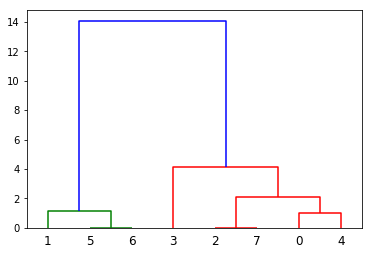

In [94]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]] #构造数据
# X = [[1,2],[3,2],[4,4],[1,2],[1,3]]
Z = shc.linkage(X, 'ward') #计算linkage矩阵  
dn = shc.dendrogram(Z
#                     ,color_threshold=3 
#                     ,orientation='right'   #{'top','bottom','left','right'}
#                     ,above_threshold_color='darkred'
#                     ,leaf_rotation=30
                   )   #绘制树形图

### 4.源码解读

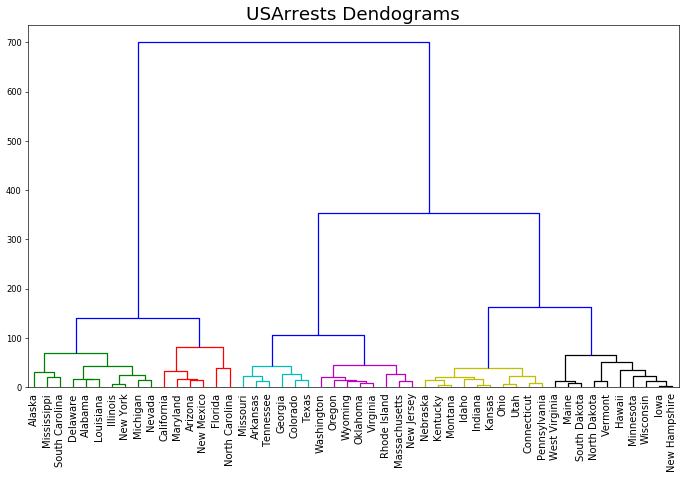

In [42]:
#创建画布
plt.figure(figsize=(14, 8), dpi= 60) 

#绘制所有特征的树形图
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward') #将所有特征编码为linkage矩阵
                      ,labels=df.State.values , color_threshold=100) 
plt.title("USArrests Dendograms", fontsize=22)  #添加标题
plt.xticks(fontsize=12) #设置X轴刻度
plt.show() #本地显示

### 5.图像解读    

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### <font color=bule> 48/50 簇状图（Cluster Plot）

簇状图可以用于划分属于同一集群的点。相当于是聚类

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week8%20Groups/%E7%B0%87%E7%8A%B6%E5%9B%BE.png' width=700>

- 横坐标：Murder
- 纵坐标：Assault   
- 颜色：每一簇标记不同的颜色（包括点的颜色和簇的颜色）

### 1.导入需要的绘图库

这里我们将用到SciPy中专门处理空间算法和数据结构的模块：SciPy库中的spatial    

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering #导入凝聚聚类包   
from scipy.spatial import ConvexHull #导入凸包

### 2.认识绘图相关函数  

**scipy.spatial.ConvexHull()**     
ConvexHull直译是凸包，表示在一个平面上，我们能找到的最小的将一组数据全部包括在内的凸集<br>
通俗的来说凸包就是包围一组散点的最小凸边形<br>
相对的我们也有凹边形

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E5%87%B8%E5%8C%85%20vs%20%E5%87%B9%E5%8C%85.PNG" align="center" />

类**ConvexHull**能够帮助我们创建N维凸包<br>
> **重要参数**
>> **points**：浮点数组成的n维数组，结构为(点的个数，维度)。表示用来构成凸包的坐标点。<br>
>> **incremental**：布尔值，可不填。允许不断向类中添加新的数据点。<br>

> **重要属性**<br>
>> **vertices**：组成凸包的那些数据点在原数据中的索引

*更多参数和属性走：https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.spatial.ConvexHull.html

### 3. 代码解读

In [4]:
#导入数据集
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv') 

In [5]:
df.head()

,Murder,Assault,UrbanPop,Rape,State
0,13.2,236,58,21.2,Alabama
1,10.0,263,48,44.5,Alaska
2,8.1,294,80,31.0,Arizona
3,8.8,190,50,19.5,Arkansas
4,9.0,276,91,40.6,California


In [6]:
#用sklearn执行凝聚聚类
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  

array([1, 1, 2, 0, 2, 0, 3, 1, 2, 0, 4, 3, 1, 3, 4, 3, 3, 1, 4, 2, 0, 1,
       4, 1, 0, 3, 3, 1, 4, 0, 2, 1, 2, 4, 3, 0, 0, 3, 0, 1, 4, 0, 0, 3,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [7]:
cluster.labels_

array([1, 1, 2, 0, 2, 0, 3, 1, 2, 0, 4, 3, 1, 3, 4, 3, 3, 1, 4, 2, 0, 1,
       4, 1, 0, 3, 3, 1, 4, 0, 2, 1, 2, 4, 3, 0, 0, 3, 0, 1, 4, 0, 0, 3,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [13]:
#定义绘制凸包的函数
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca() #获取当前子图，如果当前子图不存在，那就创建新的子图(get current axes)
    p = np.c_[x,y] #.c_功能类似于zip，不过不是生成组合的元祖，而是生成拼接起来的数组array
    hull = ConvexHull(p) #将数据集输入到ConvexHull中，自动生成凸包类型的对象
    poly = plt.Polygon(p[hull.vertices,:], **kw)
        #使用属性vertices调用形成凸包的点的索引，进行切片后，利用绘制多边形的类plt.Polygon将形成凸包的点连起来
        #这里的**kw就是定义函数的时候输入的**kw，里面包含了一系列可以在绘制多边形的类中进行调节的内容
        #包括多边形的边框颜色，填充颜色，透明度等等
    ax.add_patch(poly) #使用add_patch，将生成的多边形作为一个补丁补充到图像上

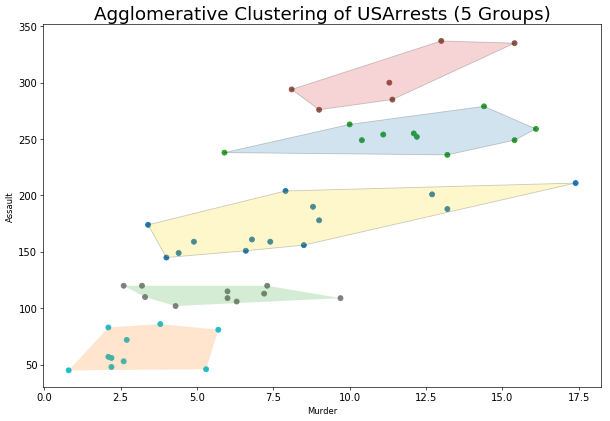

In [21]:
# Plot
plt.figure(figsize=(12, 8), dpi= 60)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')

# Draw polygon surrounding vertices    
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()

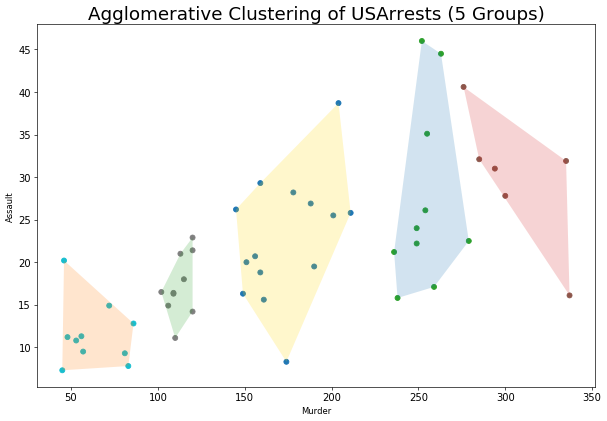

In [24]:
# 绘图
plt.figure(figsize=(12, 8), dpi= 60)  
plt.scatter(df.iloc[:,1], df.iloc[:,3], c=cluster.labels_, cmap='tab10')

# 绘制凸包   
encircle(df.loc[cluster.labels_ == 0, 'Assault'], df.loc[cluster.labels_ == 0, 'Rape'], fc="gold", alpha=0.2)   
encircle(df.loc[cluster.labels_ == 1, 'Assault'], df.loc[cluster.labels_ == 1, 'Rape'], fc="tab:blue", alpha=0.2)
encircle(df.loc[cluster.labels_ == 2, 'Assault'], df.loc[cluster.labels_ == 2, 'Rape'], fc="tab:red", alpha=0.2)
encircle(df.loc[cluster.labels_ == 3, 'Assault'], df.loc[cluster.labels_ == 3, 'Rape'], fc="tab:green", alpha=0.2)
encircle(df.loc[cluster.labels_ == 4, 'Assault'], df.loc[cluster.labels_ == 4, 'Rape'], fc="tab:orange", alpha=0.2)

# 添加装饰
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()

### 4.图像解读

### <font color=bule> 49/50 安德鲁斯曲线（Andrews Curve）

**什么是Andrews曲线？**       
Andrews曲线是一种可视化高维数据结构的方法。（多维数据可视化是指通过一些手段将高维的数据展示在二维的平面中）       
具体的做法就是将每个样本的属性值转化为傅里叶序列的系数来创建曲线，属于同一类别的曲线通常比较相似，我们可以通过将每一类曲线标记不同颜色来可视化聚类数据。     

Andrews曲线计算方式：     
$f（t）= x_1 / sqrt（2）+ x_2 sin（t）+ x_3 cos（t）+x_4 sin（2t）+ x_5 cos（2t）+ ......   $    
其中x系数对应于每个维度的值，且$-\pi<t<\pi$     
每一条样本绘制成一条Andrews曲线.

Andrews曲线的官方说明：     
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.andrews_curves.html

Andrews曲线的用途：    
- 可视化高维数据，起到聚类作用     
- 异常样本检测。同一类别的曲线基本一致，若有不一致曲线则为异常记录。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week8%20Groups/%E5%AE%89%E5%BE%B7%E9%B2%81%E6%96%AF%E6%9B%B2%E7%BA%BF.png' width=600>

### 1.导入需要的绘图包

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves  #安德鲁斯曲线

### 2.认识绘制安德鲁斯曲线的函数

**andrews_curves**    
函数功能：生成安德鲁斯曲线的matplotlib图，用于可视化多元数据的聚类    

重要参数：   
> frame：DataFrame类型的数据   
> class_column：聚类依据的列   
> ax：matplotlib子图对象，默认为None    
> samples：每条安德鲁斯曲线上的样本点数，默认为200   
> color：颜色    
> colormap：光谱   

In [20]:
# andrews_curves?

### 3.绘制鸢尾花数据集的Andrews曲线

In [22]:
from sklearn.datasets import load_iris  #导入鸢尾花数据集

In [38]:
iris = load_iris()  #实例化数据集
X = pd.DataFrame(iris.data,columns = iris.feature_names) #提取特征并将其变为 DF格式 
y = pd.DataFrame(iris.target,columns=['species']) #提取标签并将其变为 DF格式
data = pd.concat([X,y],axis=1)  #将特征和标签拼接
data.head()

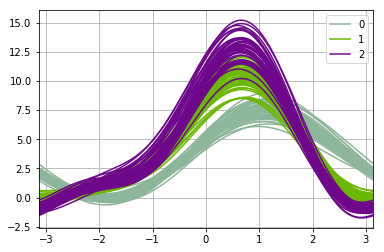

In [41]:
#绘制鸢尾花数据集的Andrews曲线
andrews_curves(data,'species');

In [54]:
[*enumerate(iris.target_names)]

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

**我们来看一下iris三种花的实际形状**

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week8%20Groups/iris%E5%AF%B9%E6%AF%94%E5%9B%BE.png' width=800>

### 4.查看绘图需要的数据集

In [5]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [7]:
df.shape

(32, 14)

对于这个数据集相信大家已经非常熟悉了哈~~~

In [6]:
name = ['英里每加仑','气缸数量','排量','总马力','驱动轴比'
        ,'重量','1/4英里所用时间','引擎形状','变速器','前进档数'
        ,'化油器数量','用油是否高效','汽车','汽车名称']

In [8]:
[*zip(df.columns,name)]

[('mpg', '英里每加仑'),
 ('cyl', '气缸数量'),
 ('disp', '排量'),
 ('hp', '总马力'),
 ('drat', '驱动轴比'),
 ('wt', '重量'),
 ('qsec', '1/4英里所用时间'),
 ('vs', '引擎形状'),
 ('am', '变速器'),
 ('gear', '前进档数'),
 ('carb', '化油器数量'),
 ('fast', '用油是否高效'),
 ('cars', '汽车'),
 ('carname', '汽车名称')]

In [9]:
#删除与绘图无关的文本型特征
df.drop(['cars', 'carname'], axis=1, inplace=True)

In [10]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1


### 5.绘制目标图形

更多colormap选择参考这里：https://matplotlib.org/examples/color/colormaps_reference.html

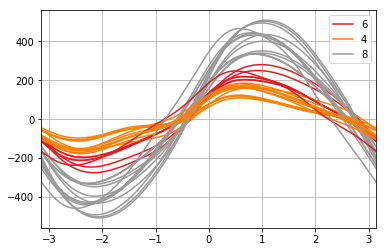

In [59]:
andrews_curves(df,'cyl',colormap='Set1');

#### 给图形添加装饰

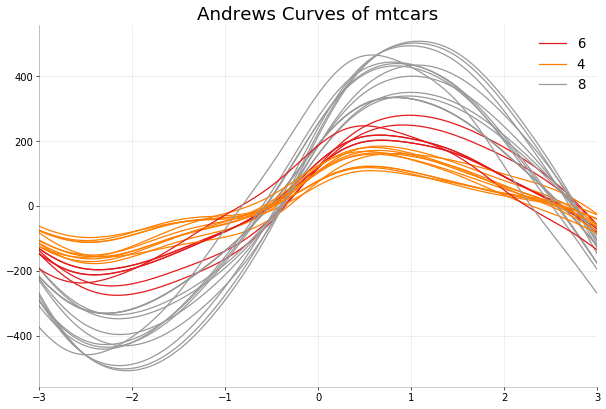

In [66]:
plt.figure(figsize=(12,8),dpi=60) #创建画布并设定画布大小   
andrews_curves(df, 'cyl', colormap='Set1') #绘制 Andrews曲线   

#弱化边框
plt.gca().spines['top'].set_alpha(0)      #去掉上边框
plt.gca().spines['right'].set_alpha(0)    #去掉右边框
plt.gca().spines['left'].set_alpha(.3)    #弱化左边框
plt.gca().spines['bottom'].set_alpha(.3)  #弱化下边框 

#添加装饰
plt.title('Andrews Curves of mtcars', fontsize=22) #添加标题
plt.xticks(fontsize=12) #设定x轴刻度字体大小
plt.yticks(fontsize=12) #设定y轴刻度字体大小
plt.xlim(-3,3)   #设定x轴刻度范围
plt.grid(alpha=0.3) #配置网格线并设定网格线的透明度
#plt.legend(fontsize=16,frameon=False)  
plt.show() #本地显示图形

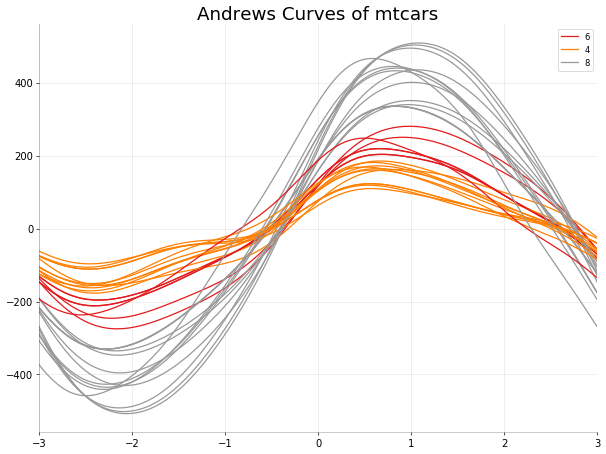

In [67]:
#源代码

# Import
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df.drop(['cars', 'carname'], axis=1, inplace=True)

# Plot
plt.figure(figsize=(12,9), dpi= 60)
andrews_curves(df, 'cyl', colormap='Set1')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-3,3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 6.图形解读

- 根据气缸数绘制出了3种不同的Andrews曲线(共32条)   
- 从3中曲线中可以看出，气缸数为4和6的这两类车各项属性比较接近，气缸数为8的车明显与他们不同   

#### 探索其他分类变量的聚类情况

In [69]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1


In [73]:
#提取出所有分类变量的特征
cols = [ 'cyl', 'vs', 'am', 'gear','carb', 'fast']

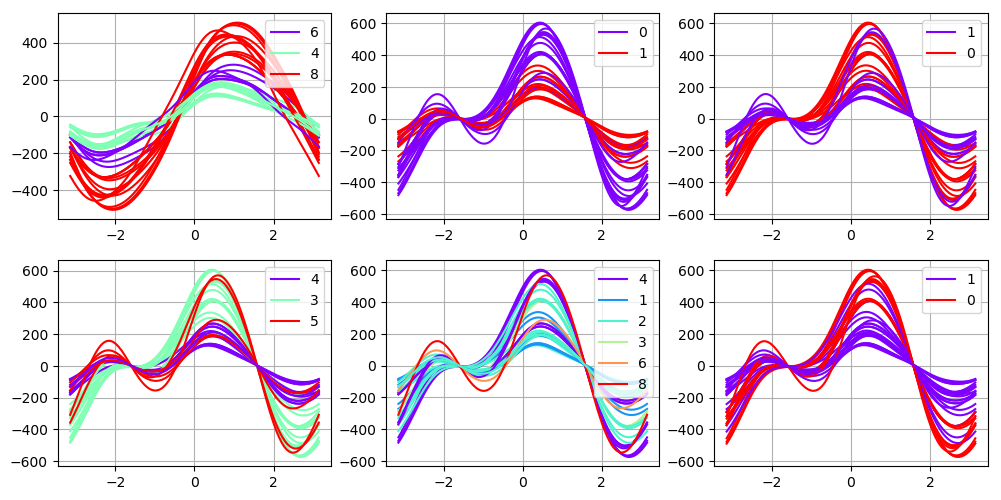

In [85]:
pl=plt.figure(figsize=(12,6),dpi=100)
for i in range(len(cols)):
    ax = pl.add_subplot(2,3,i+1)
    andrews_curves(df,cols[i],ax=ax,colormap='rainbow')

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### <font color=bule> 50/50 平行坐标（Parallel Coordinates）

平行坐标可以用来同时比较多个特征并查看特征之间的相互关系。所以平行坐标常常被用来可视化多分类的数值型数据。   
使用平行坐标时，每个点用线段联接。每个垂直的线代表一个属性。一组联接的线段表示一个数据点。可能是一类的数据点会更加接近。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week8%20Groups/%E5%B9%B3%E8%A1%8C%E5%9D%90%E6%A0%87%E5%9B%BE.png' width=600>

- 横坐标：所有特征
- 纵坐标：特征值  
- 图例：不同类别（标签类别）

### 1.导入绘制图形的包

In [92]:
import pandas as pd
from pandas.plotting import parallel_coordinates #平行坐标

### 2.认识绘制平行坐标的函数

**parallel_coordinates**   
函数功能：绘制平行坐标   

重要参数：   
> 'frame'：DF格式的数据   
> 'class_column'：标签列   
> 'color=None'：颜色    
> 'colormap=None'：色谱    
> 'axvlines=True'：控制是否添加垂直线的参数   
> 'sort_labels=False'：对class_column标签进行排序，在分配颜色时很有用  

In [96]:
# parallel_coordinates?

### 3.绘制鸢尾花数据集的平行坐标    

In [94]:
from sklearn.datasets import load_iris

In [95]:
iris = load_iris()  #实例化数据集
X = pd.DataFrame(iris.data,columns = iris.feature_names) #提取特征并将其变为 DF格式 
y = pd.DataFrame(iris.target,columns=['species']) #提取标签并将其变为 DF格式
data = pd.concat([X,y],axis=1)  #将特征和标签拼接
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


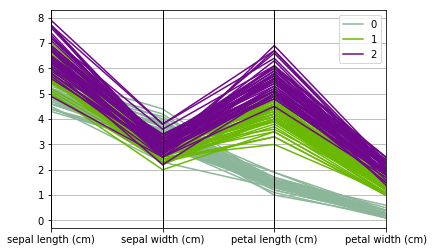

In [104]:
parallel_coordinates(data,'species');

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week8%20Groups/iris%E5%AF%B9%E6%AF%94%E5%9B%BE.png' width=800>

### 4.绘制目标图形

In [105]:
#导入绘图所需数据集
df_final = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/diamonds_filter.csv")

In [106]:
df_final.head()

,carat,depth,table,clarity,cut
0,0.73,64.6,60.0,4.0,Fair
1,0.73,66.9,54.0,0.0,Fair
2,0.50,66.5,58.0,4.0,Fair
3,0.70,64.5,57.0,4.0,Fair
4,1.01,65.3,59.0,2.0,Fair


In [107]:
df_final.shape

(599, 5)

In [109]:
df_final.describe()

,carat,depth,table,clarity
count,599.000000,599.000000,599.000000,599.000000
mean,0.901770,62.815359,57.696494,3.455760
std,0.528365,2.191752,2.201247,1.779941
min,0.250000,58.000000,51.000000,0.000000
25%,0.500000,61.300000,56.000000,2.000000
50%,0.900000,62.300000,58.000000,3.000000
75%,1.140000,64.400000,59.000000,5.000000
max,3.650000,71.300000,64.000000,7.000000


#### 绘制平行坐标

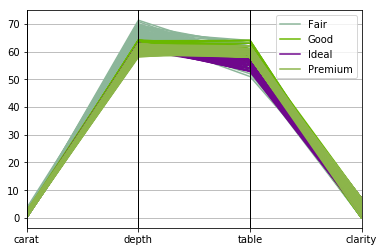

In [112]:
parallel_coordinates(df_final, 'cut');

#### 添加装饰

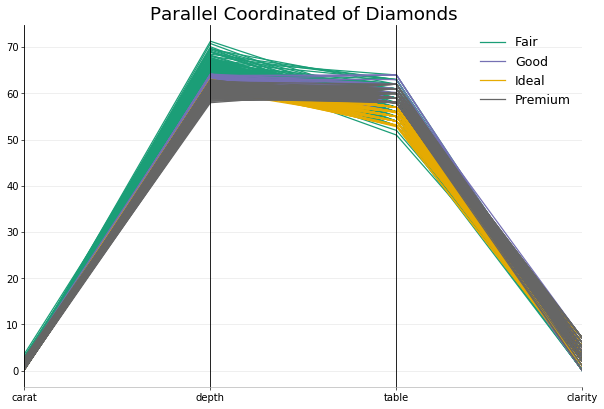

In [118]:
plt.figure(figsize=(12,8), dpi= 60) #创建画布并设定画布大小
parallel_coordinates(df_final, 'cut', colormap='Dark2') #绘制平行坐标

# 弱化边框
plt.gca().spines["top"].set_alpha(0)      #去掉上边框
plt.gca().spines["right"].set_alpha(0)    #去掉右边框
plt.gca().spines["left"].set_alpha(.3)    #弱化左边框
plt.gca().spines["bottom"].set_alpha(.3)  #弱化下边框

#添加装饰
plt.title('Parallel Coordinated of Diamonds', fontsize=22) #设置标题
plt.xticks(fontsize=12)  #设置X轴刻度字体大小
plt.yticks(fontsize=12) #设置Y轴刻度字体大小
plt.legend(frameon=False,fontsize=15) #去掉图例边框并设定图例字体大小
plt.grid(alpha=0.3)  #配置网格线并设定网格线透明度
plt.show() #本地显示图片

对于这样的图形，大家是否有注意到一个问题……    
对于carat和clarity这两个特征，几乎所有的点都重合到了一起，那是不是就说明这两个特征对于我们的标签来说，是不重要的？   
请大家再回过头来看一下我们的原始数据集     
你会发现，我们的原始数据集存在量纲不统一的问题    

In [119]:
df_final.head()

,carat,depth,table,clarity,cut
0,0.73,64.6,60.0,4.0,Fair
1,0.73,66.9,54.0,0.0,Fair
2,0.50,66.5,58.0,4.0,Fair
3,0.70,64.5,57.0,4.0,Fair
4,1.01,65.3,59.0,2.0,Fair


In [120]:
df_final.describe()

,carat,depth,table,clarity
count,599.000000,599.000000,599.000000,599.000000
mean,0.901770,62.815359,57.696494,3.455760
std,0.528365,2.191752,2.201247,1.779941
min,0.250000,58.000000,51.000000,0.000000
25%,0.500000,61.300000,56.000000,2.000000
50%,0.900000,62.300000,58.000000,3.000000
75%,1.140000,64.400000,59.000000,5.000000
max,3.650000,71.300000,64.000000,7.000000


In [122]:
from sklearn.preprocessing import MinMaxScaler as MMS   #导入归一化的包

In [125]:
X = MMS().fit_transform(df_final.iloc[:,:-1])

In [129]:
df_ = pd.concat([pd.DataFrame(X,columns=df_final.columns[:-1]),df_final.iloc[:,-1]],axis=1)

In [130]:
df_.head()

,carat,depth,table,clarity,cut
0,0.141176,0.496241,0.692308,0.571429,Fair
1,0.141176,0.669173,0.230769,0.000000,Fair
2,0.073529,0.639098,0.538462,0.571429,Fair
3,0.132353,0.488722,0.461538,0.571429,Fair
4,0.223529,0.548872,0.615385,0.285714,Fair


#### 绘制去量纲之后的平行坐标

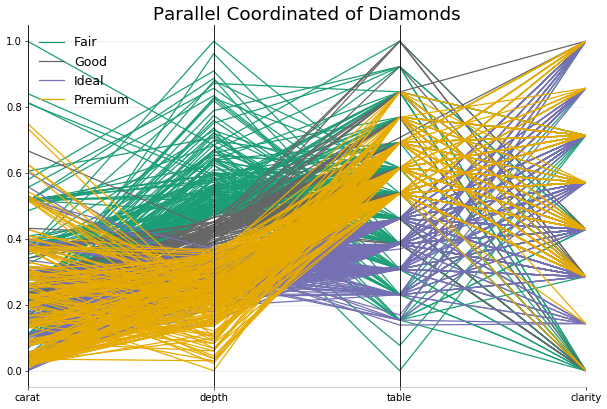

In [132]:
plt.figure(figsize=(12,8), dpi= 60) #创建画布并设定画布大小
parallel_coordinates(df_, 'cut', colormap='Dark2',sort_labels=True) #绘制平行坐标

# 弱化边框
plt.gca().spines["top"].set_alpha(0)      #去掉上边框
plt.gca().spines["right"].set_alpha(0)    #去掉右边框
plt.gca().spines["left"].set_alpha(.3)    #弱化左边框
plt.gca().spines["bottom"].set_alpha(.3)  #弱化下边框

#添加装饰
plt.title('Parallel Coordinated of Diamonds', fontsize=22) #设置标题
plt.xticks(fontsize=12)  #设置X轴刻度字体大小
plt.yticks(fontsize=12) #设置Y轴刻度字体大小
plt.legend(frameon=False,fontsize=15) #去掉图例边框并设定图例字体大小
plt.grid(alpha=0.3)  #配置网格线并设定网格线透明度
plt.show() #本地显示图片

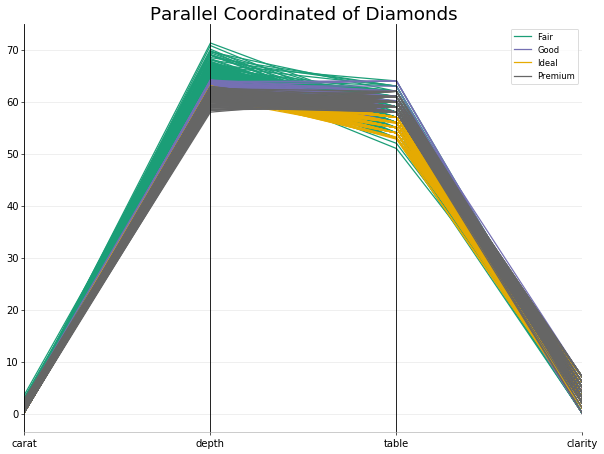

In [88]:
#源代码
# Import Data
df_final = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/diamonds_filter.csv")

# Plot
plt.figure(figsize=(12,9), dpi= 60)
parallel_coordinates(df_final, 'cut', colormap='Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()